In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# various performance metrics over different core counts
metrics_1 = pd.read_csv('../metrics-logs/metrics-1-cores.csv')
metrics_2 = pd.read_csv('../metrics-logs/metrics-2-cores.csv')
metrics_3 = pd.read_csv('../metrics-logs/metrics-3-cores.csv')
metrics_4 = pd.read_csv('../metrics-logs/metrics-4-cores.csv')
metrics_5 = pd.read_csv('../metrics-logs/metrics-5-cores.csv')
metrics_6 = pd.read_csv('../metrics-logs/metrics-6-cores.csv')
metrics_7 = pd.read_csv('../metrics-logs/metrics-7-cores.csv')
metrics_8 = pd.read_csv('../metrics-logs/metrics-8-cores.csv')
metrics_9 = pd.read_csv('../metrics-logs/metrics-9-cores.csv')
metrics_10 = pd.read_csv('../metrics-logs/metrics-10-cores.csv')
metrics_11 = pd.read_csv('../metrics-logs/metrics-11-cores.csv')
metrics_12 = pd.read_csv('../metrics-logs/metrics-12-cores.csv')
metrics_13 = pd.read_csv('../metrics-logs/metrics-13-cores.csv')
metrics_14 = pd.read_csv('../metrics-logs/metrics-14-cores.csv')
metrics_15 = pd.read_csv('../metrics-logs/metrics-15-cores.csv')
metrics_16 = pd.read_csv('../metrics-logs/metrics-16-cores.csv')
metrics_20 = pd.read_csv('../metrics-logs/metrics-20-cores.csv')
metrics_24 = pd.read_csv('../metrics-logs/metrics-24-cores.csv')
metrics_28 = pd.read_csv('../metrics-logs/metrics-28-cores.csv')

# metrics_17 for EPS variability analysis
metrics_17 = pd.read_csv('../metrics-logs/metrics-17-cores.csv')

metrics_list = [[metrics_1, 1], [metrics_2, 2], [metrics_3, 3], [metrics_4, 4], [metrics_5, 5], [metrics_6, 6], [metrics_7, 7], [metrics_8, 8], [metrics_9, 9], [metrics_10, 10], [metrics_11, 11], [metrics_12, 12], [metrics_13, 13], [metrics_14, 14], [metrics_15, 15], [metrics_16, 16], [metrics_20, 20], [metrics_24, 24], [metrics_28, 28]]


Average runtime for 1 cores: 197.63 seconds
Average runtime for 2 cores: 188.68 seconds
Average runtime for 3 cores: 189.73 seconds
Average runtime for 4 cores: 109.95 seconds
Average runtime for 5 cores: 81.80 seconds
Average runtime for 6 cores: 92.87 seconds
Average runtime for 7 cores: 90.64 seconds
Average runtime for 8 cores: 97.10 seconds
Average runtime for 9 cores: 62.58 seconds
Average runtime for 10 cores: 61.67 seconds
Average runtime for 11 cores: 60.43 seconds
Average runtime for 12 cores: 56.84 seconds
Average runtime for 13 cores: 57.65 seconds
Average runtime for 14 cores: 54.82 seconds
Average runtime for 15 cores: 51.86 seconds
Average runtime for 16 cores: 53.12 seconds
Average runtime for 20 cores: 57.69 seconds
Average runtime for 24 cores: 54.25 seconds
Average runtime for 28 cores: 64.80 seconds


/var/folders/y3/8hh0nl3j6qgdl0lq3v_dj7k00000gn/T/ipykernel_1127/2909697136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finish_events['EPS'] = finish_events['EPS'].str.replace('ms', '').astype(float)
/var/folders/y3/8hh0nl3j6qgdl0lq3v_dj7k00000gn/T/ipykernel_1127/2909697136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finish_events['EPS'] = finish_events['EPS'].str.replace('ms', '').astype(float)
/var/folders/y3/8hh0nl3j6qgdl0lq3v_dj7k00000gn/T/ipykernel_1127/2909697136.py:5: SettingWithCopyWa

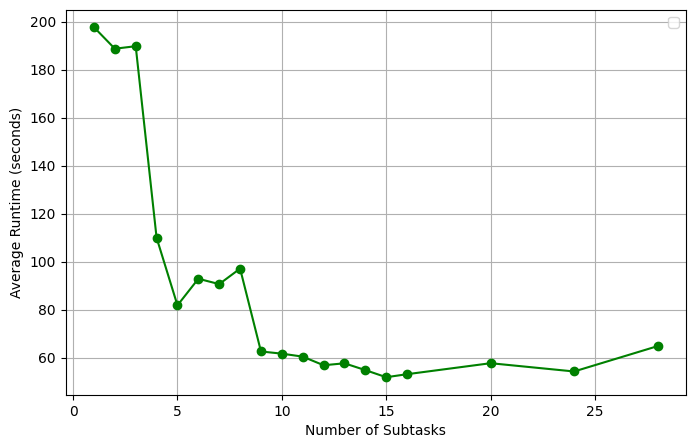

In [ ]:
def compute_average_runtime(metrics):

    finish_events = metrics.loc[metrics['Events'] == "FINISH"]

    finish_events['EPS'] = finish_events['EPS'].str.replace('ms', '').astype(float)

    return finish_events['EPS'].mean() / 1000

for metrics_tuple in metrics_list:

    metrics, cores = metrics_tuple
    average_runtime = compute_average_runtime(metrics)
    print(f"Average runtime for {cores} cores: {average_runtime:.2f} seconds")
    

cores_list = [metrics_tuple[1] for metrics_tuple in metrics_list]
average_runtimes = [compute_average_runtime(metrics_tuple[0]) for metrics_tuple in metrics_list]


plt.figure(figsize=(8, 5))
plt.plot(cores_list, average_runtimes, marker='o', linestyle='-', color='g', label='Average Runtime')
plt.xlabel('Number of Subtasks')
plt.ylabel('Average Runtime (seconds)')
# plt.title('Average Runtime vs. Number of Cores')
plt.grid(True)
plt.legend()
plt.show()

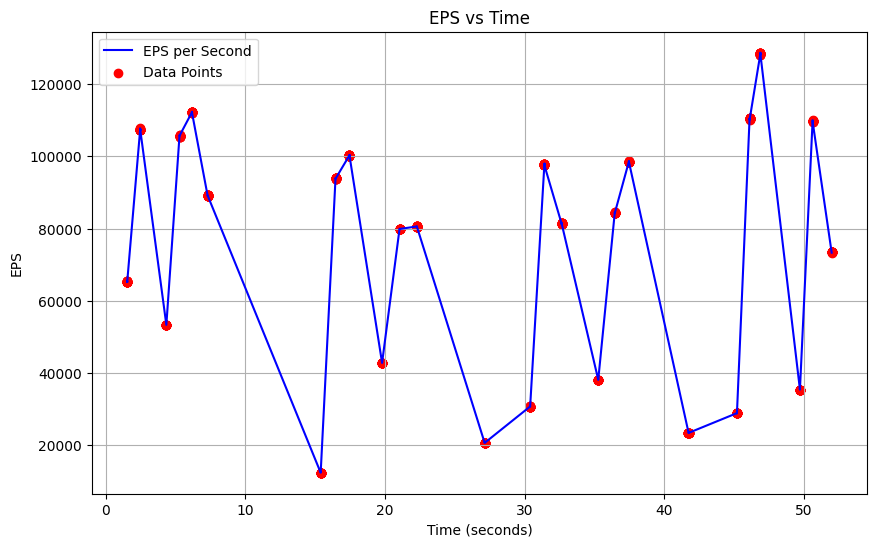

In [ ]:
# Shows general pattern of input rate: spike, stable, drop
metrics_df = metrics_17
metrics_df['time'] = metrics_df['time'] / 1000


plt.figure(figsize=(10, 6))
plt.plot(metrics_df['time'], metrics_df['EPS'], label='EPS per Second', color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('EPS')
plt.scatter(metrics_df['time'], metrics_df['EPS'], color='r', label='Data Points')
plt.title('EPS vs Time')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Eps 10-second window time aggregation
def time_window_estimates(metrics_df, cores):
    filtered_df = metrics_df[metrics_df['Events'] != 'FINISH']

    filtered_df['EPS'] = filtered_df['EPS'].str.replace('ms', '').astype(float)
    
    average_eps = filtered_df['EPS'].mean() * 10 * cores
    max_eps = filtered_df['EPS'].max() * 10 * cores
    std_dev_eps = filtered_df['EPS'].std() * 10 * math.sqrt(cores)
    
    average_eps = int(math.floor(average_eps))
    max_eps = int(math.floor(max_eps))
    std_dev_eps = int(math.floor(std_dev_eps))
    
    return average_eps, max_eps, std_dev_eps